In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF TRUNCATE

In [2]:
env='Humanoid-v4'
img_prefix =env.upper()
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMCACT"
print(df_comper.shape)

(243978, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(243763, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,16-07-2023 16:22:24,49,0,49,0.002435,1,50,True,260.395965,260.395965,260.395965,260.395965,260.395965,COMCACT
1,1,2,Humanoid-v4,16-07-2023 16:22:25,50,0,50,0.002485,1,51,True,266.295727,263.345846,263.345846,263.345846,263.345846,COMCACT
2,1,3,Humanoid-v4,16-07-2023 16:22:26,51,0,51,0.002535,1,52,True,272.212025,266.301239,266.301239,266.301239,266.301239,COMCACT
3,1,4,Humanoid-v4,16-07-2023 16:22:28,52,0,52,0.002585,1,53,True,278.125595,269.257328,269.257328,269.257328,269.257328,COMCACT
4,1,5,Humanoid-v4,16-07-2023 16:22:29,53,0,53,0.002634,1,54,True,284.045160,272.214895,272.214895,272.214895,272.214895,COMCACT


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,12-07-2023 20:25:46,16,17,0,0.000795,1,17,True,77.766375,77.766375,77.766375,77.766375,77.766375,DDPG
1,1,2,Humanoid-v4,12-07-2023 20:25:46,17,18,0,0.000845,1,18,True,82.686474,80.226424,80.226424,80.226424,80.226424,DDPG
2,1,3,Humanoid-v4,12-07-2023 20:25:46,18,19,0,0.000895,1,19,True,87.677073,82.709974,82.709974,82.709974,82.709974,DDPG
3,1,4,Humanoid-v4,12-07-2023 20:25:46,19,20,0,0.000944,1,20,True,92.646089,85.194003,85.194003,85.194003,85.194003,DDPG
4,1,5,Humanoid-v4,12-07-2023 20:25:46,20,21,0,0.000994,1,21,True,97.592705,87.673743,87.673743,87.673743,87.673743,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,16-07-2023 16:22:24,49,0,49,0.002435,1,50,True,260.395965,260.395965,260.395965,260.395965,260.395965,COMCACT
1,1,2,Humanoid-v4,16-07-2023 16:22:25,50,0,50,0.002485,1,51,True,266.295727,263.345846,263.345846,263.345846,263.345846,COMCACT
2,1,3,Humanoid-v4,16-07-2023 16:22:26,51,0,51,0.002535,1,52,True,272.212025,266.301239,266.301239,266.301239,266.301239,COMCACT
3,1,4,Humanoid-v4,16-07-2023 16:22:28,52,0,52,0.002585,1,53,True,278.125595,269.257328,269.257328,269.257328,269.257328,COMCACT
4,1,5,Humanoid-v4,16-07-2023 16:22:29,53,0,53,0.002634,1,54,True,284.045160,272.214895,272.214895,272.214895,272.214895,COMCACT


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
48850,5,48851,Humanoid-v4,14-07-2023 11:46:11,49996,49997,0,0.999,50,997,True,4768.666371,2471.460544,4530.814366,4651.391825,4746.894777,DDPG
48851,5,48852,Humanoid-v4,14-07-2023 11:46:12,49997,49998,0,0.999,50,998,True,4773.420511,2471.507665,4535.614786,4656.174967,4751.749458,DDPG
48852,5,48853,Humanoid-v4,14-07-2023 11:46:13,49998,49999,0,0.999,50,999,True,4778.148874,2471.554881,4540.414345,4660.953552,4756.582274,DDPG
48853,5,48854,Humanoid-v4,14-07-2023 11:46:14,49999,50000,0,0.999,50,1000,True,4782.857314,2471.602191,4545.212809,4665.727097,4761.393335,DDPG
48854,5,48855,Humanoid-v4,14-07-2023 11:46:15,50000,50001,0,0.999,50,1001,True,4787.559390,2471.649596,4550.010116,4670.495950,4766.184285,DDPG


In [8]:
#fig, axs = plt.subplots(nrows=2,ncols=2)
#fig.set_figwidth(15)
#fig.set_figheight(10)
#sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
#sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_truncate/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMCACT"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,16-07-2023 18:35:50,Humanoid-v4,5000,26.127320,COMCACT
1,1,16-07-2023 21:04:36,Humanoid-v4,10000,26.026661,COMCACT
2,1,16-07-2023 23:49:37,Humanoid-v4,15000,25.989737,COMCACT
3,1,17-07-2023 02:49:36,Humanoid-v4,20000,25.983898,COMCACT
4,1,17-07-2023 06:03:21,Humanoid-v4,25000,25.992532,COMCACT


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,26.014759
std,1.428571,14507.211437,0.052234
min,1.000000,5000.000000,25.927770
25%,2.000000,15000.000000,25.975781
50%,3.000000,27500.000000,26.009535
75%,4.000000,40000.000000,26.049180
max,5.000000,50000.000000,26.127320


In [11]:
path ='DPPG/data_using_truncate/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,12-07-2023 20:36:25,Humanoid-v4,5000,26.052642,DDPG
1,1,12-07-2023 20:52:15,Humanoid-v4,10000,25.986480,DDPG
2,1,12-07-2023 21:17:31,Humanoid-v4,15000,26.093028,DDPG
3,1,12-07-2023 21:52:32,Humanoid-v4,20000,26.065490,DDPG
4,1,12-07-2023 22:36:33,Humanoid-v4,25000,26.085336,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,26.029148
std,1.428571,14507.211437,0.086925
min,1.000000,5000.000000,25.903764
25%,2.000000,15000.000000,25.988752
50%,3.000000,27500.000000,26.010646
75%,4.000000,40000.000000,26.049549
max,5.000000,50000.000000,26.368338


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

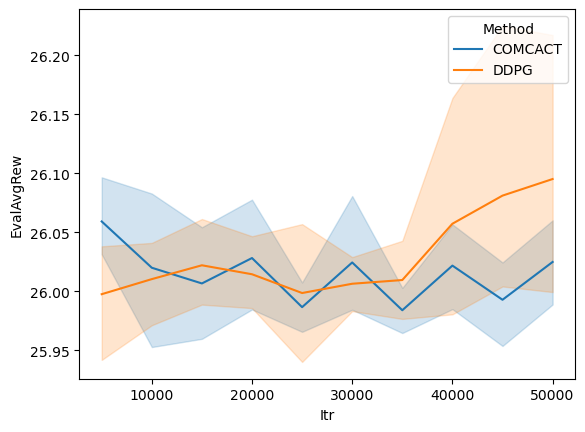

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,148,818.097387,COMCACT,548.902933
100,149,823.089564,COMCACT,554.529869
101,150,828.051555,COMCACT,560.147427
102,151,833.030621,COMCACT,565.755613
103,152,838.097767,COMCACT,571.355335


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,115,567.388161,DDPG,328.839245
100,116,571.866435,DDPG,333.780246
101,117,576.357221,DDPG,338.716953
102,118,580.824161,DDPG,343.648424
103,119,585.221824,DDPG,348.574181


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,148,818.097387,COMCACT,548.902933
100,149,823.089564,COMCACT,554.529869
101,150,828.051555,COMCACT,560.147427
102,151,833.030621,COMCACT,565.755613
103,152,838.097767,COMCACT,571.355335


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
48850,49996,4768.666371,DDPG,4530.814366
48851,49997,4773.420511,DDPG,4535.614786
48852,49998,4778.148874,DDPG,4540.414345
48853,49999,4782.857314,DDPG,4545.212809
48854,50000,4787.559390,DDPG,4550.010116


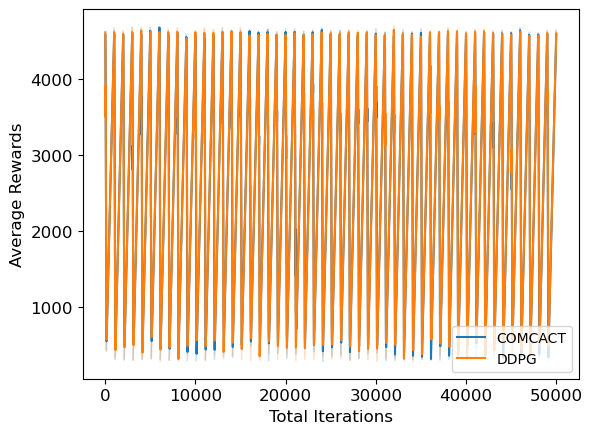

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_truncate/"+img_prefix+"-TRUNCATE-TRAINING.png")

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,26.026661,COMCACT,26.076990
2,15000,25.989737,COMCACT,26.008199
3,20000,25.983898,COMCACT,25.986818
4,25000,25.992532,COMCACT,25.988215
5,30000,26.004425,COMCACT,25.998479


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,25.986480,DDPG,26.019561
2,15000,26.093028,DDPG,26.039754
3,20000,26.065490,DDPG,26.079259
4,25000,26.085336,DDPG,26.075413
5,30000,26.026148,DDPG,26.055742


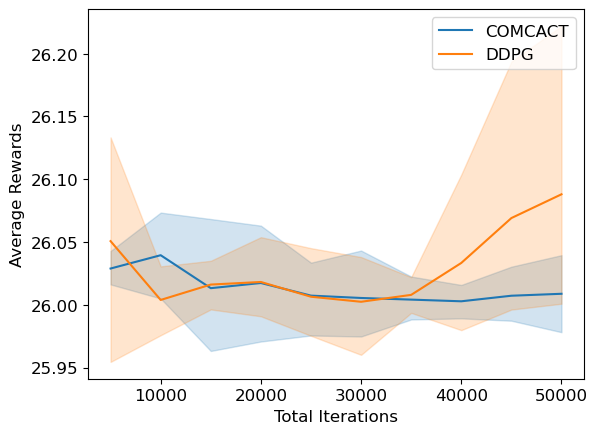

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_truncate/"+img_prefix+"-TRUNCATE-EVALUATION.png")

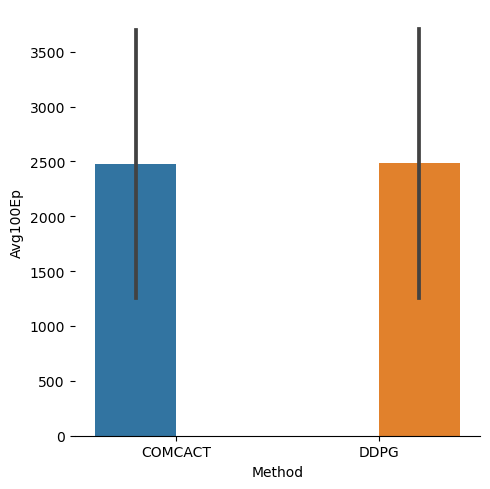

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

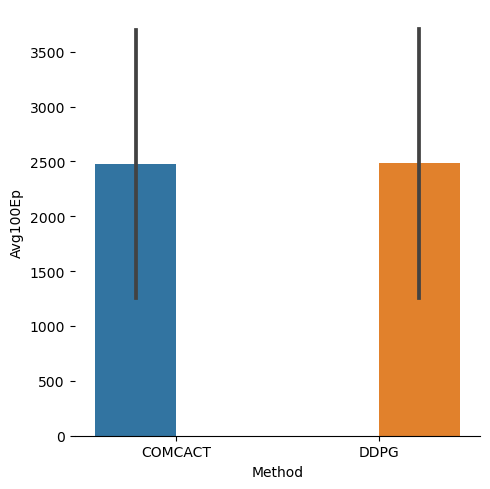

In [24]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)